### Model

Uses **euler_model** module. Make sure it is accessible.

In [1]:
#may not be in the same directory. append parent to path
#if this is run in the repository, the module will be in the parent directory
import sys
sys.path.append("../")
from euler_model.simulator import Simulator1D
import numpy as np

For now, we will work with a flat bottom. We will generate both the bathymetry and initial wave.

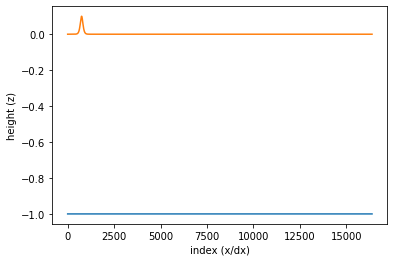

In [2]:
Nx = 2**14
dx = 0.04

#we will have h0 = 1, so the bathymetry will be constant -1, where 0 is the surface
bathymetry = np.ones(Nx) * -1

#start with a soliton: x0 = 30 (starting location), a0 = 0.1 (amplitude), h0 = 1
(eta0, phiS0) = Simulator1D.soliton(30,0.1,1,Nx,dx)

#show both bathymetry and eta in same scale
import matplotlib.pyplot as plt
plt.plot(bathymetry)
plt.plot(eta0)
plt.xlabel("index (x/dx)")
plt.ylabel("height (z)")
plt.show()

In [3]:
#instantiate simulator
dt = 0.01
sim = Simulator1D(bathymetry, dt, dx, eta0, phiS0)

Suppose we want to run the simulation and both create a video and save data every so many time-steps. We can call the `run_simulation` method, but first we need to set some options.

In [4]:
#save only the wave heights, not velocity potential
#save every 4 points
#do not convert into [x,y] coordinates; just store as a list of heights
save_eta = Simulator1D.data_save_params(dx=dx/4, point_conversion=False, eps=0, zero_trunc=0)
#this generates a dictionary that we could have easily made manually:

print(save_eta)

{'dx': 0.01, 'point_conversion': False, 'eps': 0, 'zero_trunc': 0}


In [5]:
plot_dt = 0.1; data_dt = 0.5
directory = "./demo_wave"

In [5]:
#we use the default integrator "RK4"
sim.run_simulation(
    plot_dt, data_dt, directory,
    should_continue = lambda sim: sim.t < 10,   #true until we simulate all 10 seconds
    save_eta = save_eta
)

RK4 RK4
<function Simulator1D.run_simulation.<locals>.<lambda> at 0x000001877FC3BAF8> RK4
Time: 0
Time: 1.0
Time: 2.0
Time: 3.0
Time: 4.0
Time: 5.0
Time: 6.0
Time: 7.0
Time: 8.0
Time: 9.0
Time: 10.0


<Figure size 432x288 with 0 Axes>

data is found in *demo_wavedat.json* and we have a list of png's of *demo_wave(num).png*. To convert the images to a video we can use FFMPEG. If we have the ffmpeg-python module installed, we can call:

In [6]:
import ffmpeg
(
    ffmpeg
    .input(f'{directory}%d.png', framerate=1/plot_dt)
    .output(f'{directory}.mp4')
    .run()
)

(None, None)

In [8]:
#we can also automate cleanup, and remove all the PNG files

import os
i=0
while os.path.exists(f'{directory}{i}.png'):
    os.remove(f'{directory}{i}.png')
    i+=1